In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
# from DFCompare import *

In [29]:
# Read results from previous simulation

def readPreviousResults(previous_simulation_file):
    """Reads previous simulation results saved in the results variable for a given time-step"""
    
    with open(previous_simulation_file, "rb") as handle:
        previous_results = pickle.load(handle)

    return previous_results



def getResults(results, variable_name):
    """Get a vriable results from a given time-step """
    for i in range(len(results)):
        if results[i][0] == variable_name:
            variable = results[i][1]
            return variable


def readResultsVariable(file_address, variable_name):
    with open(file_address + variable_name + ".pickle", "rb") as handle:
        variable = pickle.load(handle)
    return variable


def plotCompareSimulations(results, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(results)

    for i in range(nb_simulations):
        name_simulation = results[i][0]
        x_values = results[i][1]
        y_values = results[i][2]
        plt.plot(x_values, y_values, label=name_simulation)
    plt.legend()
    plt.savefig(save_filename)
    plt.show()




def plotConvergence(results, meshes, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(meshes)
    x_values = np.zeros(nb_simulations)
    final_values = np.zeros(nb_simulations)

    for i in range(nb_simulations):
        x_values[i] = meshes[i]
        final_values[i] = max(results[i][2])
    plt.plot(x_values, final_values, marker='.')

    plt.legend()
    plt.savefig(save_filename)
    plt.show()



def plotConvergenceComparison(results1, results2, meshes, title, label_x, label_y, save_filename):

    fig, axes = plt.subplots()
    axes.grid(True, which="both")
    axes.axhline(y=0, color="k")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    nb_simulations = len(meshes)
    x_values = np.zeros(nb_simulations)
    final_values1 = np.zeros(nb_simulations)
    final_values2 = np.zeros(nb_simulations)

    for i in range(nb_simulations):
        x_values[i] = meshes[i]
        final_values1[i] = max(results1[i][2])
        final_values2[i] = max(results2[i][2])
    plt.plot(x_values, final_values1, marker='.',label='Uniform mesh')
    plt.plot(x_values, final_values2, marker='.',label="Non-uniform mesh")

    plt.legend()
    plt.savefig(save_filename)
    plt.show()

## LIP: uniform mesh

In [27]:
# Uniform mesh 1250 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "1250el/lipfield_"
time_data_uniform_1250el = readResultsVariable(file_address, "time_data")

# time_simulation = time_data_uniform_1250el[0]
time_simulation = time_data_uniform_1250el[0] - 1*10**-7
dt_uniform_1250el = time_data_uniform_1250el[1]
n_steps_uniform_1250el = int(time_simulation/ dt_uniform_1250el)

# n_steps_uniform_1250el = time_data_uniform_1250el[2]
size_uniform_1250el = int(n_steps_uniform_1250el / 10 +1)
n_fragments_uniform_1250el = np.zeros(size_uniform_1250el)
avg_stress_bar_uniform_1250el = np.zeros(size_uniform_1250el)
i = 0
for n in range(n_steps_uniform_1250el):
    if n%10 ==0:
        results_uniform_1250el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments_uniform_1250el[i] = getResults(results_uniform_1250el, "n_fragments")
        avg_stress_bar_uniform_1250el[i] = getResults(results_uniform_1250el, "avg_stress_bar")
        i += 1


# Uniform mesh 2500 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "2500el/lipfield_"

time_data_uniform_2500el = readResultsVariable(file_address, "time_data")
dt_uniform_2500el = time_data_uniform_2500el[1]
n_steps_uniform_2500el = int(time_simulation/ dt_uniform_2500el)
# n_steps_uniform_2500el = time_data_uniform_2500el[2]

size_uniform_2500el = int(n_steps_uniform_2500el / 10 +1)
n_fragments_uniform_2500el = np.zeros(size_uniform_2500el)
avg_stress_bar_uniform_2500el = np.zeros(size_uniform_2500el)
i = 0
for n in range(n_steps_uniform_2500el):
    if n%10 ==0:
        results_uniform_2500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments_uniform_2500el[i] = getResults(results_uniform_2500el, "n_fragments")
        avg_stress_bar_uniform_2500el[i] = getResults(results_uniform_2500el, "avg_stress_bar")
        i += 1


# Uniform mesh 5000 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "5000el/lipfield_"

time_data_uniform_5000el = readResultsVariable(file_address, "time_data")
dt_uniform_5000el = time_data_uniform_5000el[1]
n_steps_uniform_5000el = int(time_simulation/ dt_uniform_5000el)
# n_steps_uniform_5000el = time_data_uniform_5000el[2]

size_uniform_5000el = int(n_steps_uniform_5000el / 10+1)
n_fragments_uniform_5000el = np.zeros(size_uniform_5000el)
avg_stress_bar_uniform_5000el = np.zeros(size_uniform_5000el)
i = 0
for n in range(n_steps_uniform_5000el):
    if n%10 ==0:
        results_uniform_5000el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments_uniform_5000el[i] = getResults(results_uniform_5000el, "n_fragments")
        avg_stress_bar_uniform_5000el[i] = getResults(results_uniform_5000el, "avg_stress_bar")
        i += 1


# Uniform mesh 7500 
filepath = "LOG/mesh_study/lipfield_uniform_mesh/"
file_address = filepath + "7500el/lipfield_"

time_data_uniform_7500el = readResultsVariable(file_address, "time_data")
dt_uniform_7500el = time_data_uniform_7500el[1]
n_steps_uniform_7500el = int(time_simulation/ dt_uniform_7500el)
# n_steps_uniform_7500el = time_data_uniform_7500el[2]

size_uniform_7500el = int(n_steps_uniform_7500el / 10)
n_fragments_uniform_7500el = np.zeros(size_uniform_7500el)
avg_stress_bar_uniform_7500el = np.zeros(size_uniform_7500el)
i = 0
for n in range(n_steps_uniform_7500el):
    if n%10 ==0:
        results_uniform_7500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments_uniform_7500el[i] = getResults(results_uniform_7500el, "n_fragments")
        avg_stress_bar_uniform_7500el[i] = getResults(results_uniform_7500el, "avg_stress_bar")
        i += 1



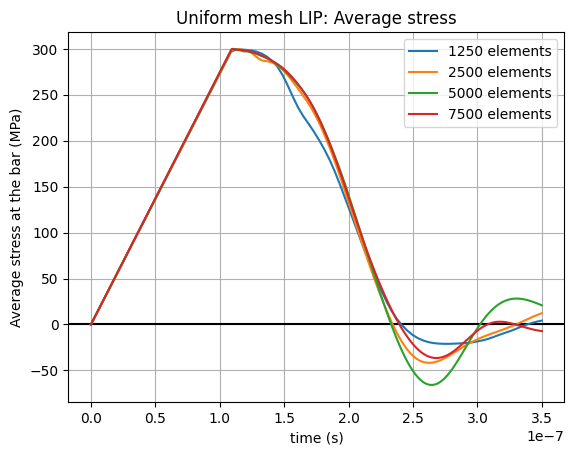

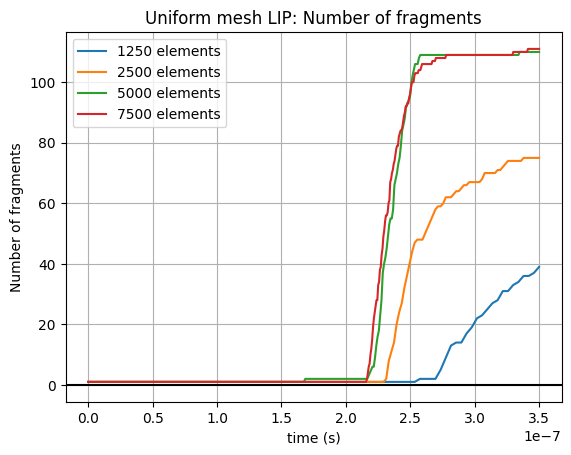

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


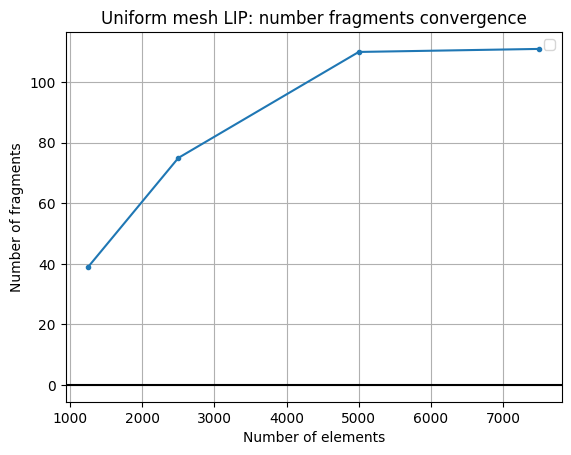

In [28]:
## Separate the results you want to compare
time_simulation = time_data_uniform_1250el[0] - 1*10**-7

time_uniform_1250el = np.linspace(0, time_simulation, size_uniform_1250el)
time_uniform_2500el = np.linspace(0, time_simulation, size_uniform_2500el)
time_uniform_5000el = np.linspace(0, time_simulation, size_uniform_5000el)
time_uniform_7500el = np.linspace(0, time_simulation, size_uniform_7500el)



stress_bar = [
    ["1250 elements", time_uniform_1250el, avg_stress_bar_uniform_1250el/10**6],
    ["2500 elements", time_uniform_2500el, avg_stress_bar_uniform_2500el/10**6],
    ["5000 elements", time_uniform_5000el, avg_stress_bar_uniform_5000el/10**6],
    ["7500 elements", time_uniform_7500el, avg_stress_bar_uniform_7500el/10**6],
]

plotCompareSimulations(
    stress_bar,
    title="Uniform mesh LIP: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/lip_uniform_mesh_avg_stress.svg",
)


nfrag_uniform = [
    ["1250 elements", time_uniform_1250el, n_fragments_uniform_1250el],
    ["2500 elements", time_uniform_2500el, n_fragments_uniform_2500el],
    ["5000 elements", time_uniform_5000el, n_fragments_uniform_5000el],
    ["7500 elements", time_uniform_7500el, n_fragments_uniform_7500el],
]

plotCompareSimulations(
    nfrag_uniform,
    title="Uniform mesh LIP: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/lip_uniform_mesh_n_fragments.svg",
)


# Convergence number fragments
meshes = [1250, 2500, 5000, 7500]

# Convergence dissipated energy
plotConvergence(
    nfrag_uniform,
    meshes, 
    title="Uniform mesh LIP: number fragments convergence",
    label_x="Number of elements",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/lip_uniform_mesh_convergence.svg",
)




## LIP: non-uniform mesh

In [30]:
# Non-Uniform mesh 1250 
filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
file_address = filepath + "1250el/lipfield_"
time_data_non_uniform_1250el = readResultsVariable(file_address, "time_data")

time_simulation = time_data_uniform_1250el[0] - 1*10**-7
dt_non_uniform_1250el = time_data_non_uniform_1250el[1]
n_steps_non_uniform_1250el = int(time_simulation/ dt_non_uniform_1250el)
# n_steps_non_uniform_1250el = time_data_non_uniform_1250el[2]

size_non_uniform_1250el = int(n_steps_non_uniform_1250el / 10 +1)
n_fragments_non_uniform_1250el = np.zeros(size_non_uniform_1250el)
avg_stress_bar_non_uniform_1250el = np.zeros(size_non_uniform_1250el)
i = 0
for n in range(n_steps_non_uniform_1250el):
    if n%10 ==0:
        results_non_uniform_1250el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments_non_uniform_1250el[i] = getResults(results_non_uniform_1250el, "n_fragments")
        avg_stress_bar_non_uniform_1250el[i] = getResults(results_non_uniform_1250el, "avg_stress_bar")
        i += 1


# Non-Uniform mesh 2500 
filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
file_address = filepath + "2500el/lipfield_"

time_data_non_uniform_2500el = readResultsVariable(file_address, "time_data")
dt_non_uniform_2500el = time_data_non_uniform_2500el[1]
n_steps_non_uniform_2500el = int(time_simulation/ dt_non_uniform_2500el)
# n_steps_non_uniform_2500el = time_data_non_uniform_2500el[2]

size_non_uniform_2500el = int(n_steps_non_uniform_2500el / 10 +1)
n_fragments_non_uniform_2500el = np.zeros(size_non_uniform_2500el)
avg_stress_bar_non_uniform_2500el = np.zeros(size_non_uniform_2500el)
i = 0
for n in range(n_steps_non_uniform_2500el):
    if n%10 ==0:
        results_non_uniform_2500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments_non_uniform_2500el[i] = getResults(results_non_uniform_2500el, "n_fragments")
        avg_stress_bar_non_uniform_2500el[i] = getResults(results_non_uniform_2500el, "avg_stress_bar")
        i += 1


# Non-Uniform mesh 5000 
filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
file_address = filepath + "5000el/lipfield_"

time_data_non_uniform_5000el = readResultsVariable(file_address, "time_data")
dt_non_uniform_5000el = time_data_non_uniform_5000el[1]
n_steps_non_uniform_5000el = int(time_simulation/ dt_non_uniform_5000el)
# n_steps_non_uniform_5000el = time_data_non_uniform_5000el[2]

size_non_uniform_5000el = int(n_steps_non_uniform_5000el / 10+1)
n_fragments_non_uniform_5000el = np.zeros(size_non_uniform_5000el)
avg_stress_bar_non_uniform_5000el = np.zeros(size_non_uniform_5000el)
i = 0
for n in range(n_steps_non_uniform_5000el):
    if n%10 ==0:
        results_non_uniform_5000el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments_non_uniform_5000el[i] = getResults(results_non_uniform_5000el, "n_fragments")
        avg_stress_bar_non_uniform_5000el[i] = getResults(results_non_uniform_5000el, "avg_stress_bar")
        i += 1


# Non-Uniform mesh 7500 
# filepath = "LOG/mesh_study/lipfield_non_uniform_mesh/"
# file_address = filepath + "7500el/lipfield_"
# time_data_non_uniform_7500el = readResultsVariable(file_address, "time_data")
# n_steps_non_uniform_7500el = time_data_non_uniform_7500el[2]
# size_non_uniform_7500el = int(n_steps_non_uniform_7500el / 10+1)
# n_fragments_non_uniform_7500el = np.zeros(size_non_uniform_7500el)
# avg_stress_bar_non_uniform_7500el = np.zeros(size_non_uniform_7500el)
# i = 0
# for n in range(n_steps_non_uniform_7500el):
#     if n%10 ==0:
#         results_non_uniform_7500el = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
#         n_fragments_non_uniform_7500el[i] = getResults(results_non_uniform_7500el, "n_fragments")
#         avg_stress_bar_non_uniform_7500el[i] = getResults(results_non_uniform_7500el, "avg_stress_bar")
#         i += 1


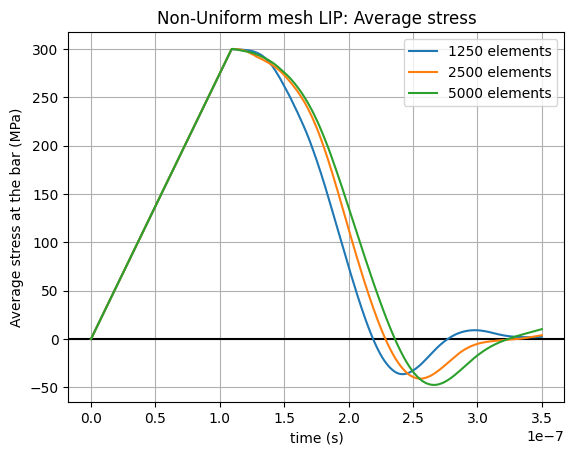

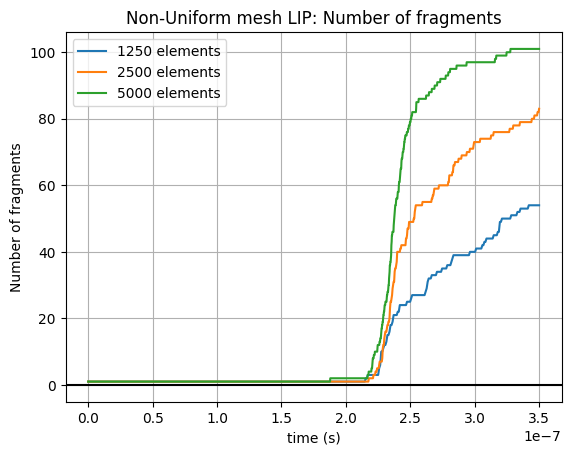

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


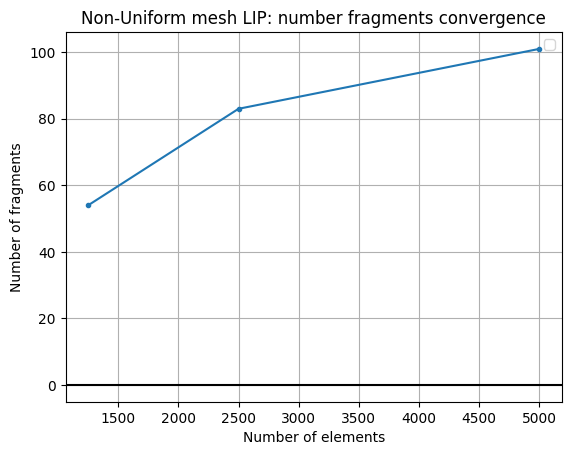

In [31]:
# Separate the results you want to compare

time_non_uniform_1250el = np.linspace(0, time_simulation, size_non_uniform_1250el)
time_non_uniform_2500el = np.linspace(0, time_simulation, size_non_uniform_2500el)
time_non_uniform_5000el = np.linspace(0, time_simulation, size_non_uniform_5000el)
# time_non_uniform_7500el = np.linspace(0, time_simulation, size_non_uniform_7500el)



stress_bar = [
    ["1250 elements", time_non_uniform_1250el, avg_stress_bar_non_uniform_1250el/10**6],
    ["2500 elements", time_non_uniform_2500el, avg_stress_bar_non_uniform_2500el/10**6],
    ["5000 elements", time_non_uniform_5000el, avg_stress_bar_non_uniform_5000el/10**6],
    # ["7500 elements", time_non_uniform_7500el, avg_stress_bar_non_uniform_7500el/10**6],
]

plotCompareSimulations(
    stress_bar,
    title="Non-Uniform mesh LIP: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/lip_non_uniform_mesh_avg_stress.svg",
)


nfrag_non_uniform = [
    ["1250 elements", time_non_uniform_1250el, n_fragments_non_uniform_1250el],
    ["2500 elements", time_non_uniform_2500el, n_fragments_non_uniform_2500el],
    ["5000 elements", time_non_uniform_5000el, n_fragments_non_uniform_5000el],
    # ["7500 elements", time_non_uniform_7500el, n_fragments_non_uniform_7500el],
]

plotCompareSimulations(
    nfrag_non_uniform,
    title="Non-Uniform mesh LIP: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/lip_non_uniform_mesh_n_fragments.svg",
)


# Convergence number fragments
# meshes = [1250, 2500, 5000, 7500]
meshes = [1250, 2500, 5000]

# Convergence dissipated energy
plotConvergence(
    nfrag_non_uniform,
    meshes, 
    title="Non-Uniform mesh LIP: number fragments convergence",
    label_x="Number of elements",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/lip_uniform_mesh_convergence.svg",
)

## LIP: Uniform x Non-Uniform mesh

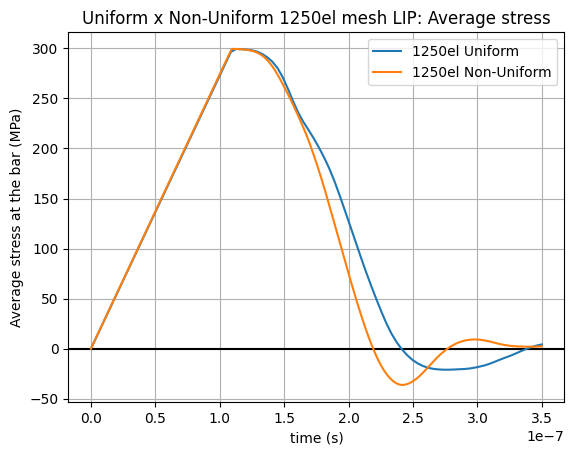

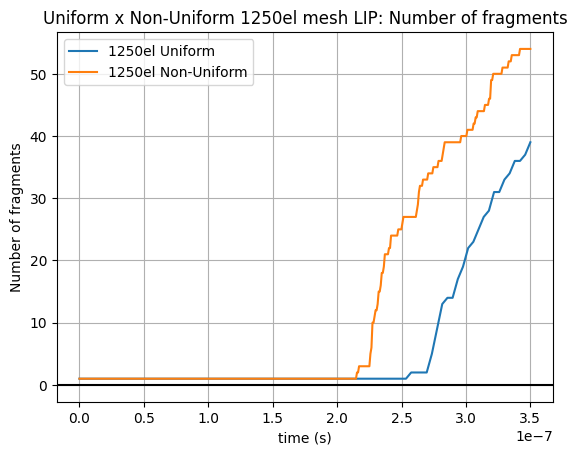

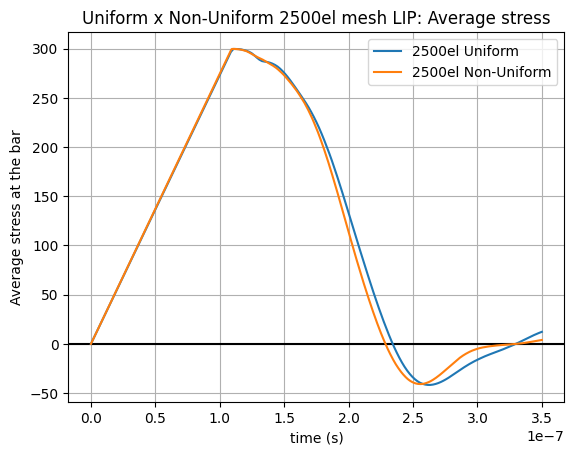

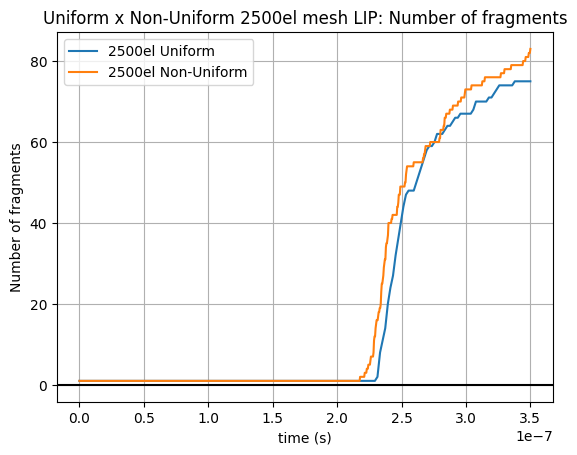

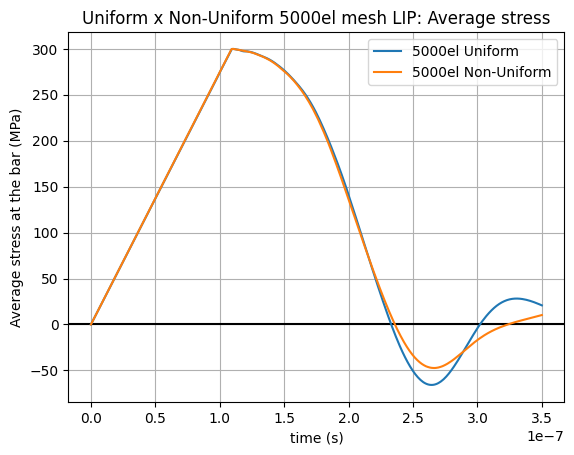

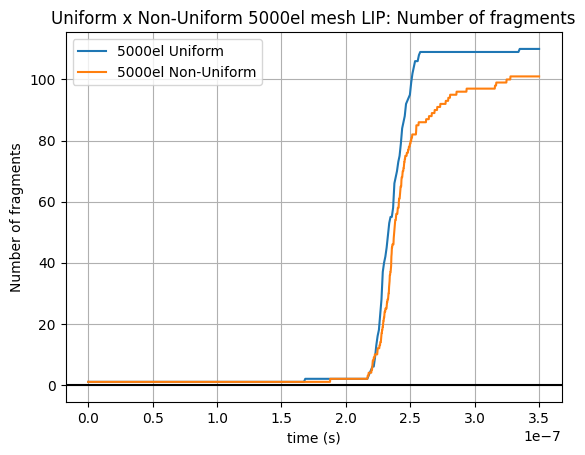

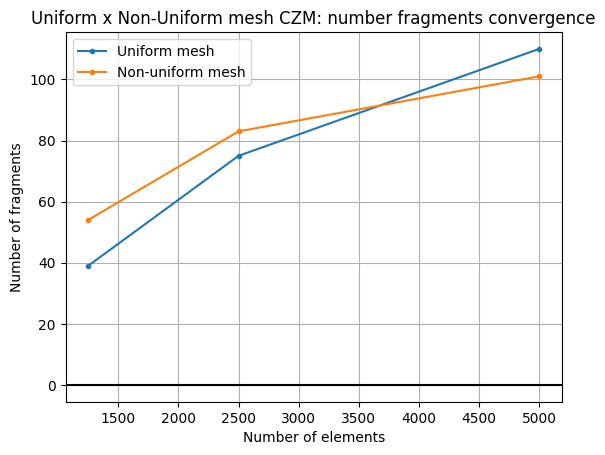

In [32]:
# 1250 elements

stress_bar = [
    ["1250el Uniform", time_uniform_1250el, avg_stress_bar_uniform_1250el/10**6],
    ["1250el Non-Uniform", time_non_uniform_1250el, avg_stress_bar_non_uniform_1250el/10**6],
]


plotCompareSimulations(
    stress_bar,
    title="Uniform x Non-Uniform 1250el mesh LIP: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/lip_1250el_avg_stress.svg",
)

nfrag = [
    ["1250el Uniform", time_uniform_1250el, n_fragments_uniform_1250el],
    ["1250el Non-Uniform", time_non_uniform_1250el, n_fragments_non_uniform_1250el],
]
plotCompareSimulations(
    nfrag,
    title="Uniform x Non-Uniform 1250el mesh LIP: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/lip_1250el_n_fragments.svg",
)


# 2500 elements

stress_bar = [
    ["2500el Uniform", time_uniform_2500el, avg_stress_bar_uniform_2500el/10**6],
    ["2500el Non-Uniform", time_non_uniform_2500el, avg_stress_bar_non_uniform_2500el/10**6],
]

plotCompareSimulations(
    stress_bar,
    title="Uniform x Non-Uniform 2500el mesh LIP: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar",
    save_filename="LOG/mesh_study/plots/lip_2500el_avg_stress.svg",
)

nfrag = [
    ["2500el Uniform", time_uniform_2500el, n_fragments_uniform_2500el],
    ["2500el Non-Uniform", time_non_uniform_2500el, n_fragments_non_uniform_2500el],
]
plotCompareSimulations(
    nfrag,
    title="Uniform x Non-Uniform 2500el mesh LIP: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/lip_1250el_n_fragments.svg",
)

# 5000 elements

stress_bar = [
    ["5000el Uniform", time_uniform_5000el, avg_stress_bar_uniform_5000el/10**6],
    ["5000el Non-Uniform", time_non_uniform_5000el, avg_stress_bar_non_uniform_5000el/10**6],
]

plotCompareSimulations(
    stress_bar,
    title="Uniform x Non-Uniform 5000el mesh LIP: Average stress",
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
    save_filename="LOG/mesh_study/plots/lip_5000el_avg_stress.svg",
)

nfrag = [
    ["5000el Uniform", time_uniform_5000el, n_fragments_uniform_5000el],
    ["5000el Non-Uniform", time_non_uniform_5000el, n_fragments_non_uniform_5000el],
]
plotCompareSimulations(
    nfrag,
    title="Uniform x Non-Uniform 5000el mesh LIP: Number of fragments",
    label_x="time (s)",
    label_y="Number of fragments",
    save_filename="LOG/mesh_study/plots/lip_5000el_n_fragments.svg",
)

# 7500 elements

# stress_bar = [
#     ["7500el Uniform", time_uniform_7500el, avg_stress_bar_uniform_7500el/10**6],
#     ["7500el Non-Uniform", time_non_uniform_7500el, avg_stress_bar_non_uniform_7500el/10**6],
# ]

# plotCompareSimulations(
#     stress_bar,
#     title="Uniform x Non-Uniform 7500el mesh CZM: Average stress",
#     label_x="time (s)",
#     label_y="Average stress at the bar (MPa)",
#     save_filename="LOG/mesh_study/plots/czm_7500el_avg_stress.svg",
# )

# nfrag = [
#     ["7500el Uniform", time_uniform_7500el, n_fragments_uniform_7500el],
#     ["7500el Non-Uniform", time_non_uniform_7500el, n_fragments_non_uniform_7500el],
# ]
# plotCompareSimulations(
#     nfrag,
#     title="Uniform x Non-Uniform 7500el mesh CZM: Number of fragments",
#     label_x="time (s)",
#     label_y="Number of fragments",
#     save_filename="LOG/mesh_study/plots/czm_7500el_n_fragments.svg",
# )


plotConvergenceComparison(
    nfrag_uniform, 
    nfrag_non_uniform, 
    meshes, 
    title="Uniform x Non-Uniform mesh CZM: number fragments convergence", 
    label_x="Number of elements",
    label_y="Number of fragments", 
    save_filename="LOG/mesh_study/plots/czm_mesh_convergence.svg")